In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import username, password, hostname, port, DB


In [2]:

employee_uri = f'postgresql://{username}:{password}@{hostname}:{port}/{DB}'
engine = create_engine(employee_uri, echo=True) 

In [3]:
connection = engine.connect()

2021-05-17 17:10:36,733 INFO sqlalchemy.engine.base.Engine select version()
2021-05-17 17:10:36,736 INFO sqlalchemy.engine.base.Engine {}
2021-05-17 17:10:36,738 INFO sqlalchemy.engine.base.Engine select current_schema()
2021-05-17 17:10:36,739 INFO sqlalchemy.engine.base.Engine {}
2021-05-17 17:10:36,741 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-05-17 17:10:36,741 INFO sqlalchemy.engine.base.Engine {}
2021-05-17 17:10:36,742 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-05-17 17:10:36,742 INFO sqlalchemy.engine.base.Engine {}
2021-05-17 17:10:36,743 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2021-05-17 17:10:36,743 INFO sqlalchemy.engine.base.Engine {}


In [4]:
salary_df = pd.read_sql("SELECT * FROM salaries",connection)

2021-05-17 17:10:36,758 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2021-05-17 17:10:36,759 INFO sqlalchemy.engine.base.Engine {'name': 'SELECT * FROM salaries'}
2021-05-17 17:10:36,761 INFO sqlalchemy.engine.base.Engine SELECT * FROM salaries
2021-05-17 17:10:36,762 INFO sqlalchemy.engine.base.Engine {}


In [5]:
salary_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [12]:
salary_df["salary"]

0         60117
1         65828
2         40006
3         40054
4         78228
          ...  
300019    40000
300020    58058
300021    49597
300022    40000
300023    63707
Name: salary, Length: 300024, dtype: int64

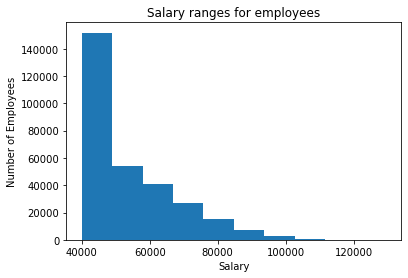

In [29]:
plt.hist(salary_df["salary"], bins = 10)
plt.ylabel("Number of Employees")
plt.xlabel("Salary")
plt.title("Salary ranges for employees")
plt.savefig("SalaryRangeEmployees",dpi=100)
plt.show()

In [30]:
query = "SELECT titles.title, AVG(s.salary) AS Average_Salary \
FROM employees AS e \
LEFT JOIN salaries AS s ON e.emp_no = s.emp_no \
LEFT JOIN titles ON e.emp_title = titles.title_id \
GROUP BY titles.title \
ORDER BY Average_Salary DESC"

AVG_salary = pd.read_sql(query,connection)

2021-05-17 17:24:15,566 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2021-05-17 17:24:15,567 INFO sqlalchemy.engine.base.Engine {'name': 'SELECT titles.title, AVG(s.salary) AS Average_Salary FROM employees AS e LEFT JOIN salaries AS s ON e.emp_no = s.emp_no LEFT JOIN titles ON e.emp_title = titles.title_id GROUP BY titles.title ORDER BY Average_Salary DESC'}
2021-05-17 17:24:15,568 INFO sqlalchemy.engine.base.Engine SELECT titles.title, AVG(s.salary) AS Average_Salary FROM employees AS e LEFT JOIN salaries AS s ON e.emp_no = s.emp_no LEFT JOIN titles ON e.emp_title = titles.title_id GROUP BY titles.title ORDER BY Average_Salary DESC
2021-05-17 17:24:15,568 INFO sqlalchemy.engine.base.Engine {}


In [31]:
AVG_salary

,title,average_salary
0,Senior Staff,58550.172704
1,Staff,58465.382850
2,Manager,51531.041667
3,Technique Leader,48582.896092
4,Assistant Engineer,48564.434447
5,Engineer,48535.336511
6,Senior Engineer,48506.799871


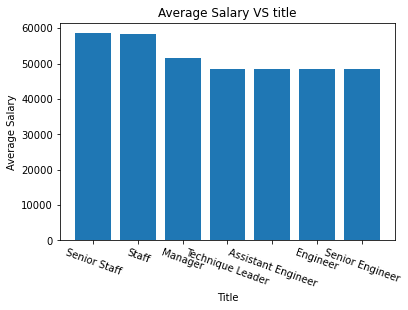

In [32]:
xaxis = AVG_salary["title"]
yaxis = AVG_salary["average_salary"]
plt.bar(xaxis,yaxis)
plt.title('Average Salary VS title')
plt.xticks(rotation=-20)
plt.xlabel('Title')
plt.ylabel('Average Salary')
plt.savefig("AveragesalaryVStitle",dpi=100)
plt.show()

In [33]:
query = "SELECT * FROM employees WHERE emp_no = 499942"
myid = pd.read_sql(query,connection)


2021-05-17 17:24:26,860 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2021-05-17 17:24:26,860 INFO sqlalchemy.engine.base.Engine {'name': 'SELECT * FROM employees WHERE emp_no = 499942'}
2021-05-17 17:24:26,861 INFO sqlalchemy.engine.base.Engine SELECT * FROM employees WHERE emp_no = 499942
2021-05-17 17:24:26,862 INFO sqlalchemy.engine.base.Engine {}


In [34]:
myid

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
